## Define Parameters


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm  # Import for progress bar

In [ ]:
L = 100  # Lattice size
T_1 = 1
T_2 = 10
T_step = 0.2  # Temperature step size
k = 1  # Boltzmann constant in arbitrary units
J1, J2, J3 = 1.0 * k, 0.5 * k, 0.2 * k  # Interaction constants
steps = 1000  # Number of Monte Carlo steps

# Define null matrices
T_values = np.arange(T_1, T_2 + T_step, T_step)
M_T = np.zeros(len(T_values))
E_T = np.zeros(len(T_values))

## Define a Random System

In [ ]:
def initialize_lattice(L):
    return np.random.choice([-1, 1], size=(L, L))
initialize_lattice(L)

array([[ 1, -1,  1, ..., -1, -1,  1],
       [ 1, -1,  1, ...,  1, -1,  1],
       [-1,  1,  1, ..., -1,  1,  1],
       ...,
       [-1,  1,  1, ..., -1, -1, -1],
       [ 1,  1,  1, ..., -1,  1, -1],
       [-1, -1, -1, ...,  1,  1,  1]])

Plot the matrix


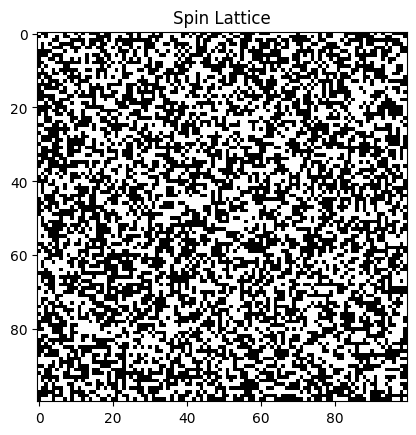

In [ ]:
def plot_spins(lattice):
  plt.imshow(lattice, cmap='gray', interpolation='nearest')
  plt.title('Spin Lattice')
  plt.show()
lattice = initialize_lattice(L)
plot_spins(lattice)

##Calculate Energy


In [ ]:
def calculate_energy(lattice, J1, J2, J3):
    L = lattice.shape[0]
    energy = 0
    for i in range(L):
        for j in range(L):
            S = lattice[i, j]
            neighbors = lattice[(i+1)%L, j] + lattice[i, (j+1)%L] + lattice[(i-1)%L, j] + lattice[i, (j-1)%L]
            second_neighbors = lattice[(i+1)%L, (j+1)%L] + lattice[(i-1)%L, (j-1)%L]
            third_neighbors = lattice[(i+2)%L, j] + lattice[i, (j+2)%L] + lattice[(i-2)%L, j] + lattice[i, (j-2)%L]
            energy += S * (-J1 * neighbors - J2 * second_neighbors - J3 * third_neighbors)
    return energy

## Monte Carlo Algorithm

In [ ]:
def monte_carlo(lattice, T, J1, J2, J3):
    L = lattice.shape[0]
    for _ in range(L**2):

        ## Calculate Energy difference of a randm spin ##
        i, j = np.random.randint(0, L), np.random.randint(0, L)   # chooses a random spin
        S = lattice[i, j]                                         # S is the value of our spin which is random, 1 or -1

        # Primary Energy
        E_1 = S * -(J1 * (lattice[(i+1)%L, j] + lattice[i, (j+1)%L] + lattice[(i-1)%L, j] + lattice[i, (j-1)%L]) +
                    J2 * (lattice[(i+1)%L, (j+1)%L] + lattice[(i+1)%L, (j-1)%L] + lattice[(i-1)%L, (j+1)%L] + lattice[(i-1)%L, (j-1)%L]) +
                    J3 * (lattice[(i+2)%L, j] + lattice[i, (j+2)%L] + lattice[(i-2)%L, j] + lattice[i, (j-2)%L]))
        #Energy if flipped
        E_2 = (-S) * -(J1 * (lattice[(i+1)%L, j] + lattice[i, (j+1)%L] + lattice[(i-1)%L, j] + lattice[i, (j-1)%L]) +
                       J2 * (lattice[(i+1)%L, (j+1)%L] + lattice[(i+1)%L, (j-1)%L] + lattice[(i-1)%L, (j+1)%L] + lattice[(i-1)%L, (j-1)%L]) +
                       J3 * (lattice[(i+2)%L, j] + lattice[i, (j+2)%L] + lattice[(i-2)%L, j] + lattice[i, (j-2)%L]))

        #Energy Difference (E_flip)
        dE = E_2 - E_1

        # Conditions for flipping the spin
        if dE < 0 or np.random.rand() < np.exp(-dE / (k*T)):
            lattice[i, j] = -S
    return lattice



## Ising Model (Find E and M)

In [ ]:
def simulate_ising_model(L, T, J1, J2, J3, steps):
    lattice = initialize_lattice(L)
    energies, magnetizations = [], []

    for _ in tqdm(range(steps), desc=f"Simulating Ising Model at T={T}"):
        lattice = monte_carlo(lattice, T, J1, J2, J3)
        energies.append(calculate_energy(lattice, J1, J2, J3))
        magnetizations.append(np.sum(lattice))

    return np.mean(energies), np.mean(magnetizations)


##Function for Plotting the Results

In [ ]:
def plot_E_M(average_energies, average_magnetizations, T_values, L, J1, J2, J3, steps):
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(T_values, average_energies, marker='o')
    plt.title(f'Average Energy\nL={L}, J1={J1}, J2={J2}, J3={J3}, steps={steps}')
    plt.xlabel('Temperature')
    plt.ylabel('Average Energy')

    plt.subplot(1, 2, 2)
    plt.plot(T_values, average_magnetizations, marker='o')
    plt.title(f'Average Magnetization\nL={L}, J1={J1}, J2={J2}, J3={J3}, steps={steps}')
    plt.xlabel('Temperature')
    plt.ylabel('Average Magnetization')

    plt.tight_layout()
    plt.show()


## time average

In [ ]:
average_energies = []
average_magnetizations = []

for T in T_values:
    avg_energy, avg_magnetization = simulate_ising_model(L, T, J1, J2, J3, steps)
    average_energies.append(avg_energy)
    average_magnetizations.append(avg_magnetization)

# Plot the results
plot_E_M(average_energies, average_magnetizations, T_values, L, J1, J2, J3, steps)

This is the result: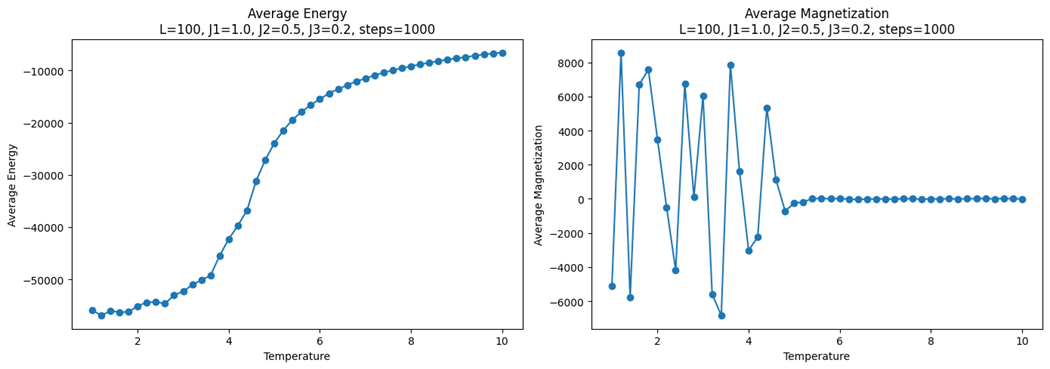

## ensemble average

<ipython-input-82-ece2fc1211d2>:22: RuntimeWarning: divide by zero encountered in scalar divide
  if dE < 0 or np.random.rand() < np.exp(-dE / (k*T)):
<ipython-input-82-ece2fc1211d2>:22: RuntimeWarning: invalid value encountered in scalar divide
  if dE < 0 or np.random.rand() < np.exp(-dE / (k*T)):
Simulating Ising Model: 100%|██████████| 1000/1000 [07:03<00:00,  2.36it/s]


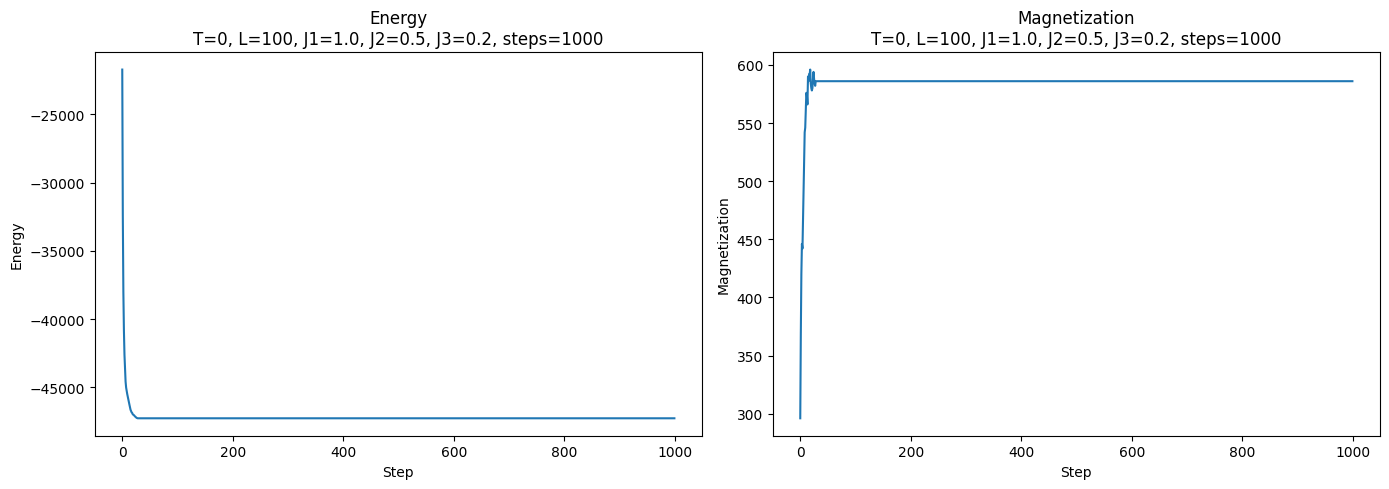

Simulating Ising Model: 100%|██████████| 1000/1000 [06:49<00:00,  2.44it/s]


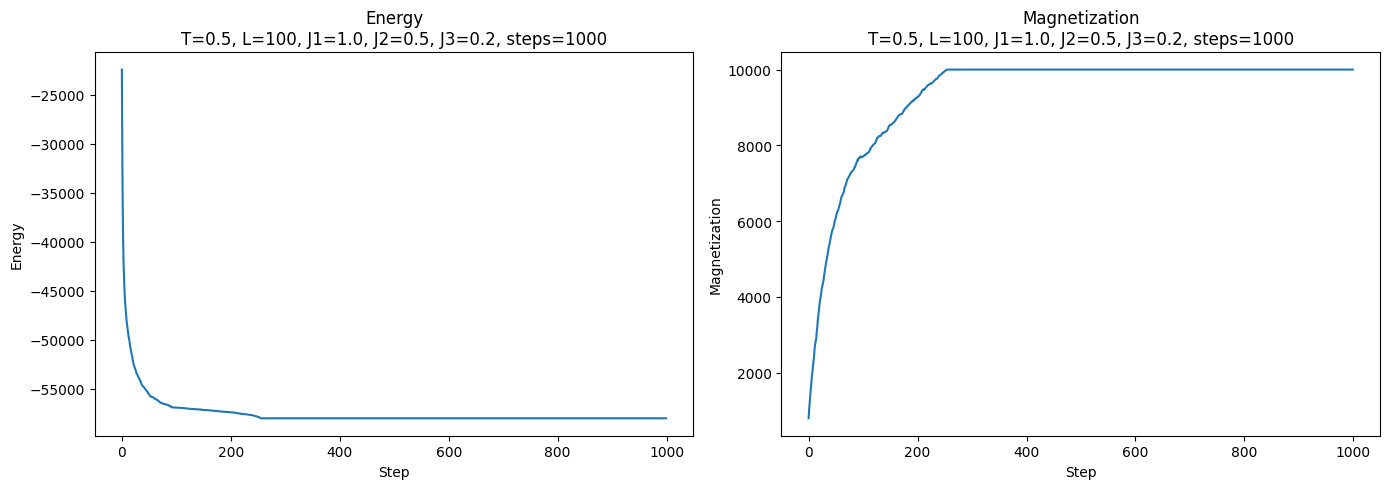

Simulating Ising Model: 100%|██████████| 1000/1000 [06:48<00:00,  2.45it/s]


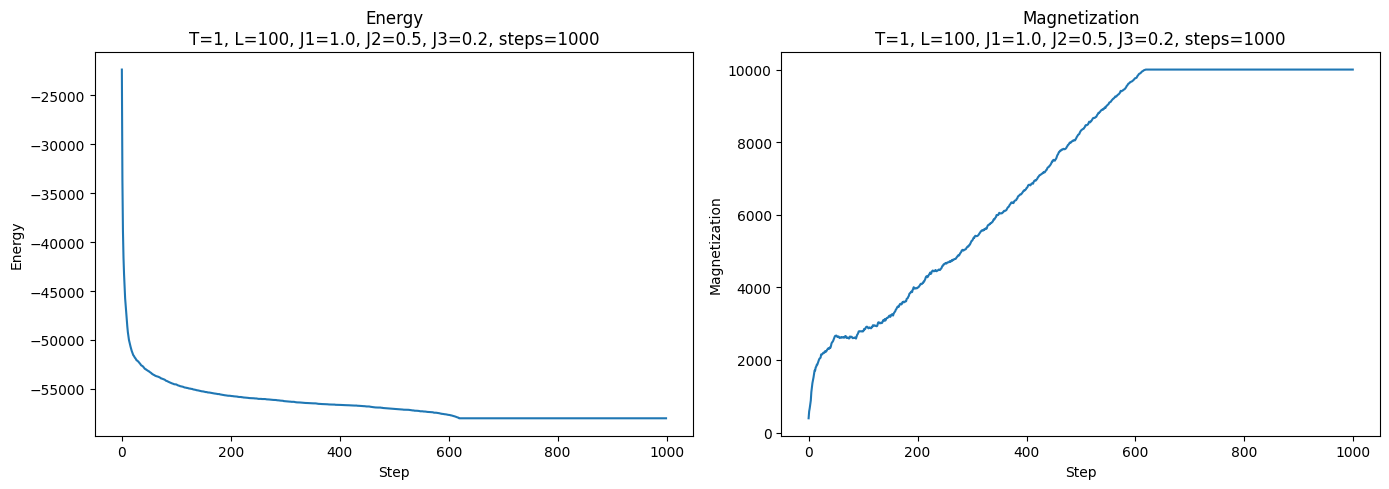

Simulating Ising Model: 100%|██████████| 1000/1000 [06:51<00:00,  2.43it/s]


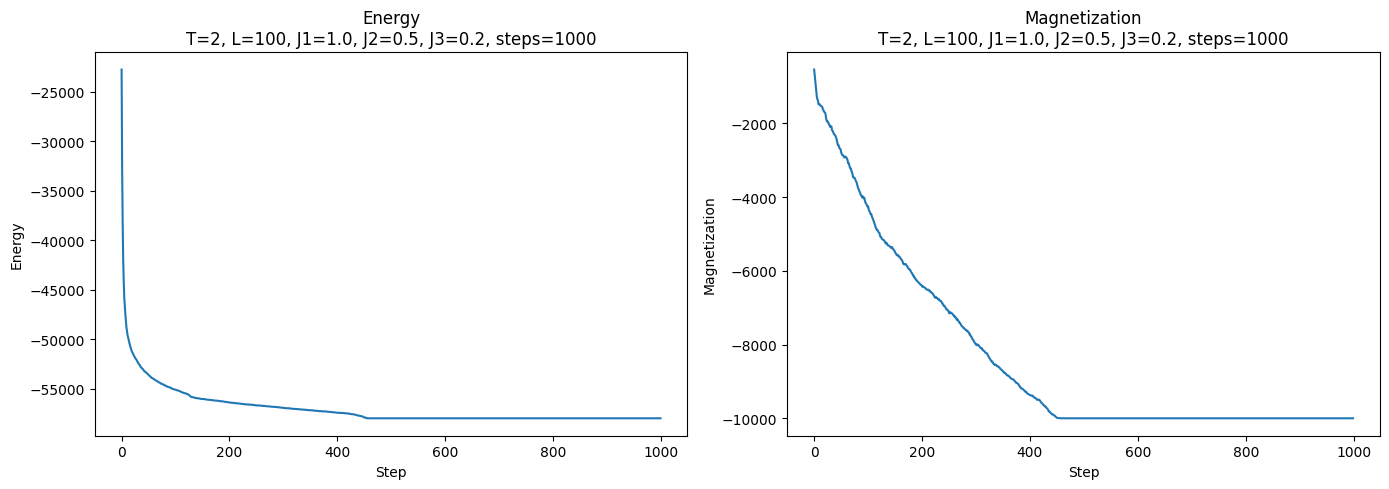

Simulating Ising Model: 100%|██████████| 1000/1000 [06:45<00:00,  2.47it/s]


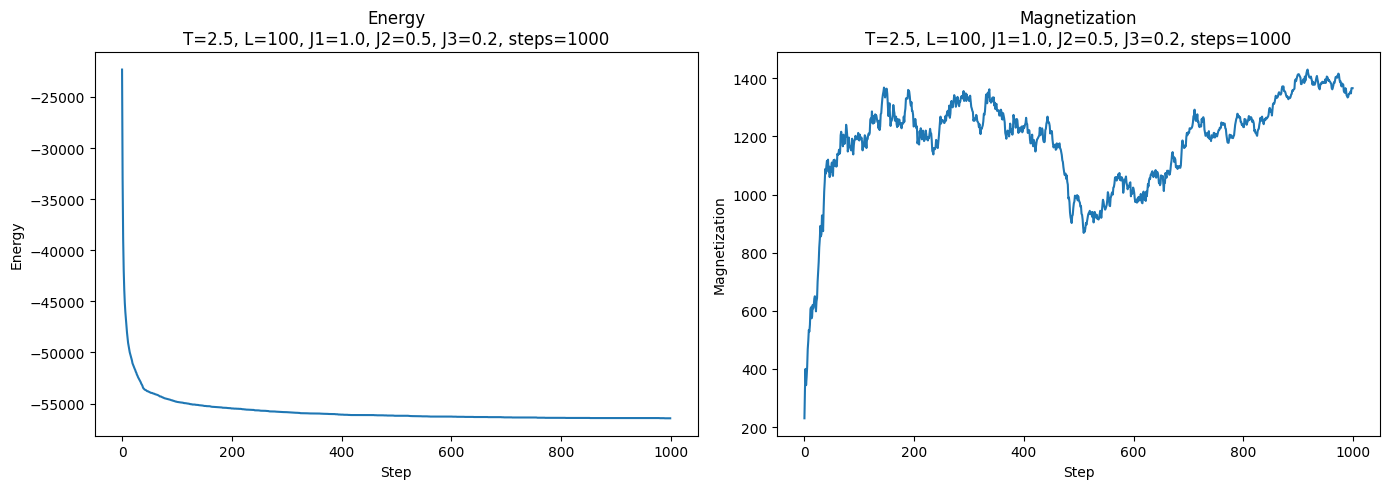

Simulating Ising Model: 100%|██████████| 1000/1000 [06:46<00:00,  2.46it/s]


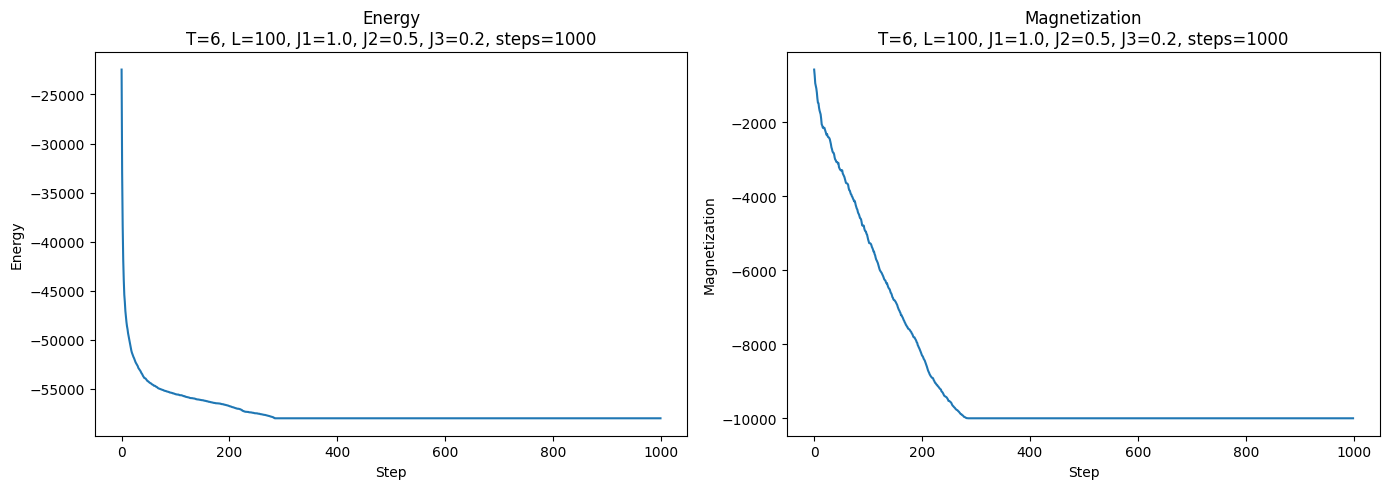

Simulating Ising Model: 100%|██████████| 1000/1000 [07:01<00:00,  2.37it/s]


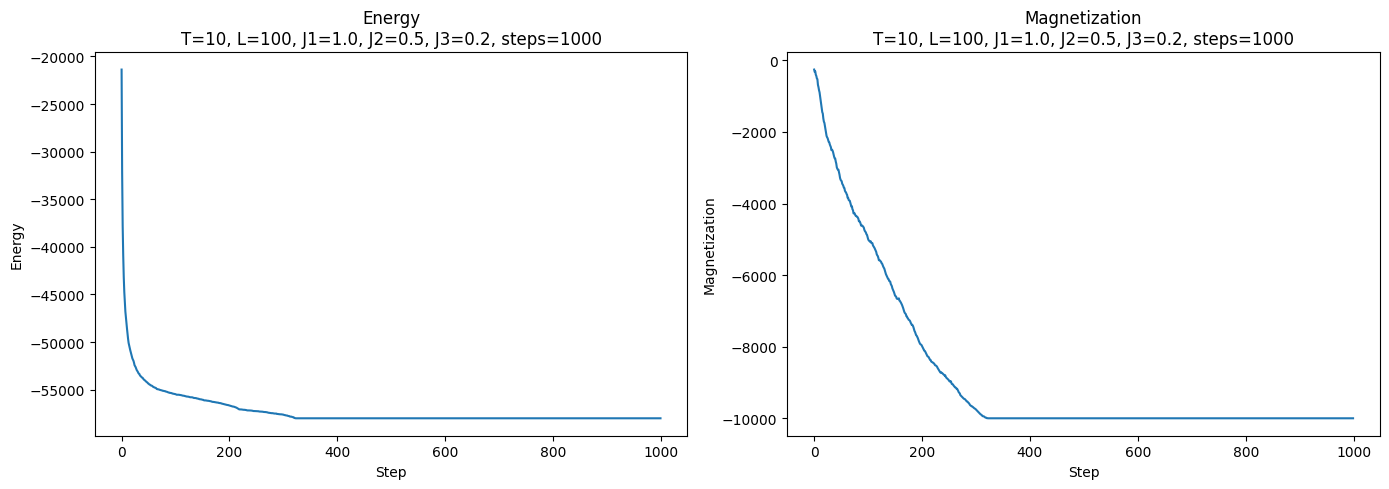

Simulating Ising Model: 100%|██████████| 1000/1000 [06:53<00:00,  2.42it/s]


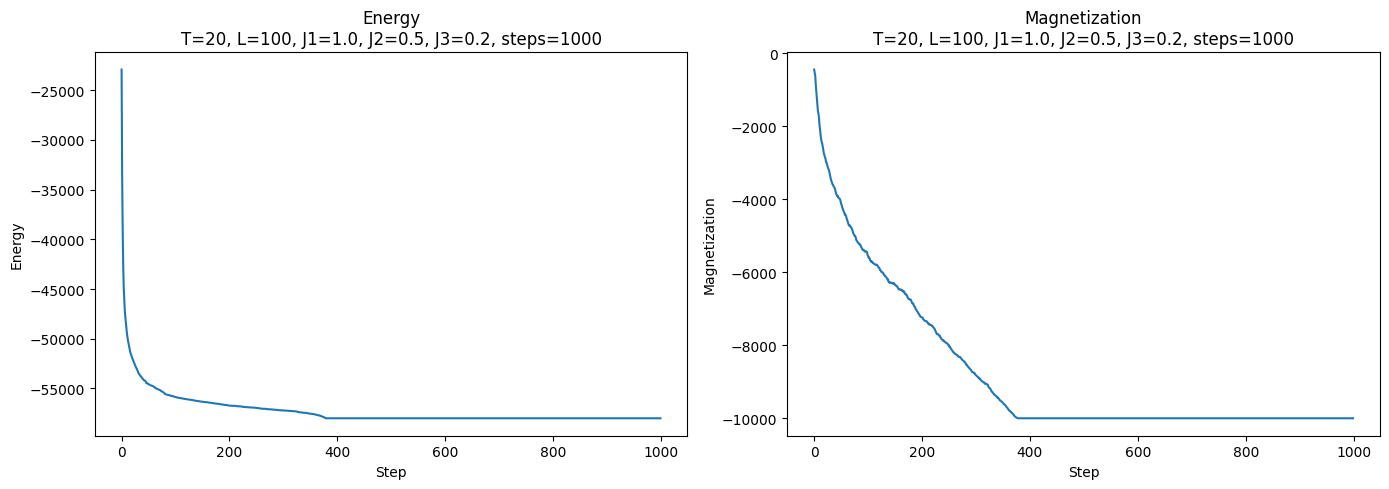

In [ ]:
for T in [0,0.5,1,2,2.5,6,10,20]:
  monte_carlo(lattice, T, J1, J2, J3)
  energies, magnetizations = simulate_ising_model(L, T, J1, J2, J3, steps)
  plot_E_M(energies, magnetizations, T, L, J1, J2, J3, steps)

## different values of L


Simulating Ising Model: 100%|██████████| 1000/1000 [00:01<00:00, 998.93it/s]


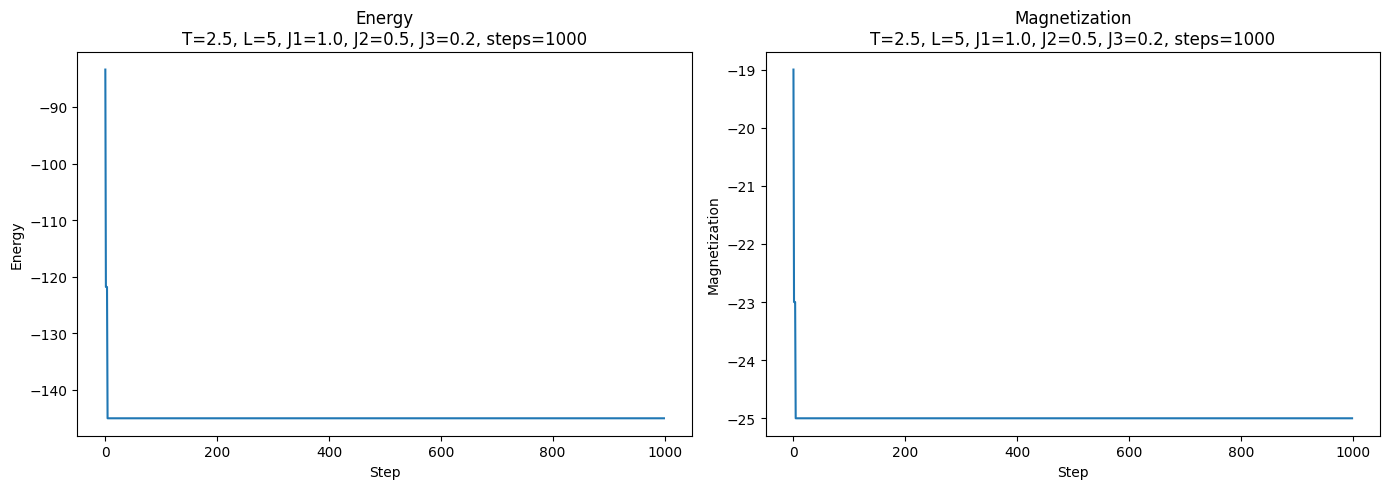

Simulating Ising Model: 100%|██████████| 1000/1000 [00:03<00:00, 253.75it/s]


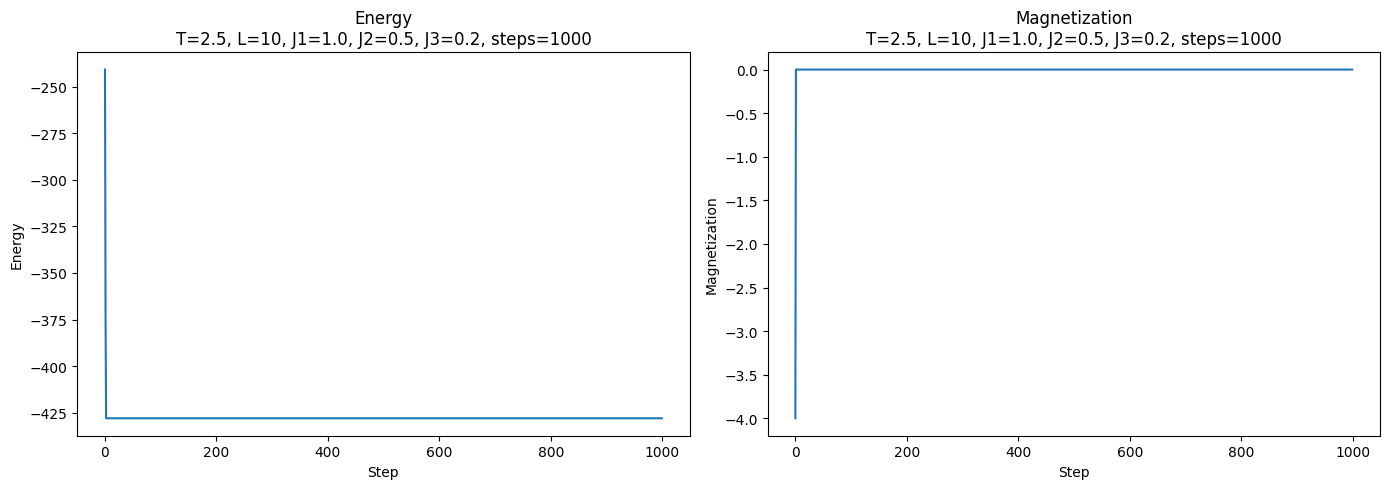

Simulating Ising Model: 100%|██████████| 1000/1000 [00:18<00:00, 53.74it/s]


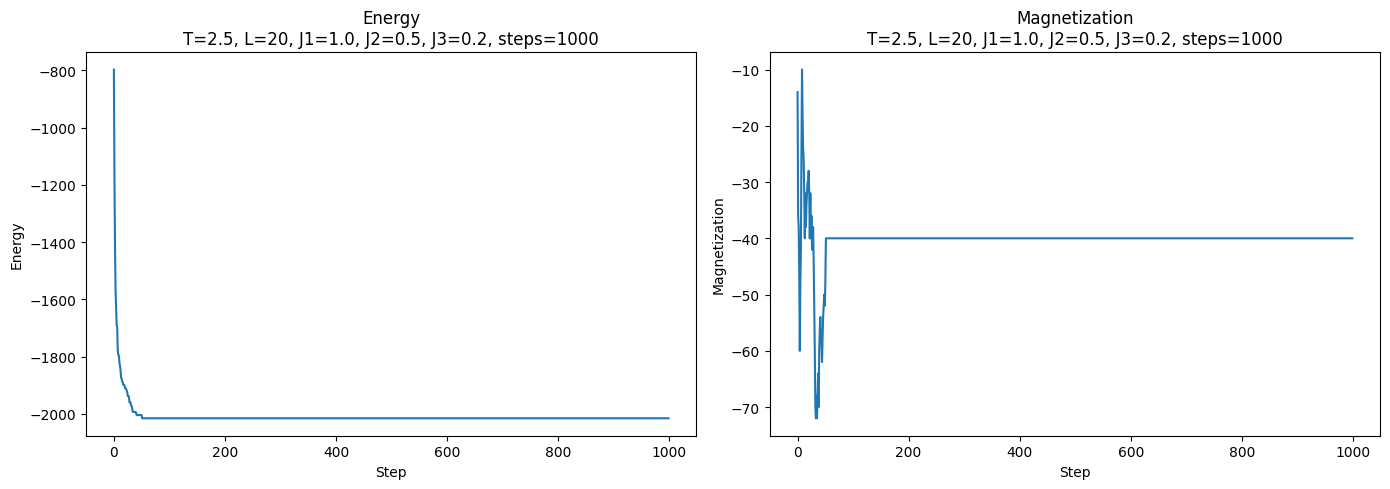

Simulating Ising Model: 100%|██████████| 1000/1000 [01:44<00:00,  9.54it/s]


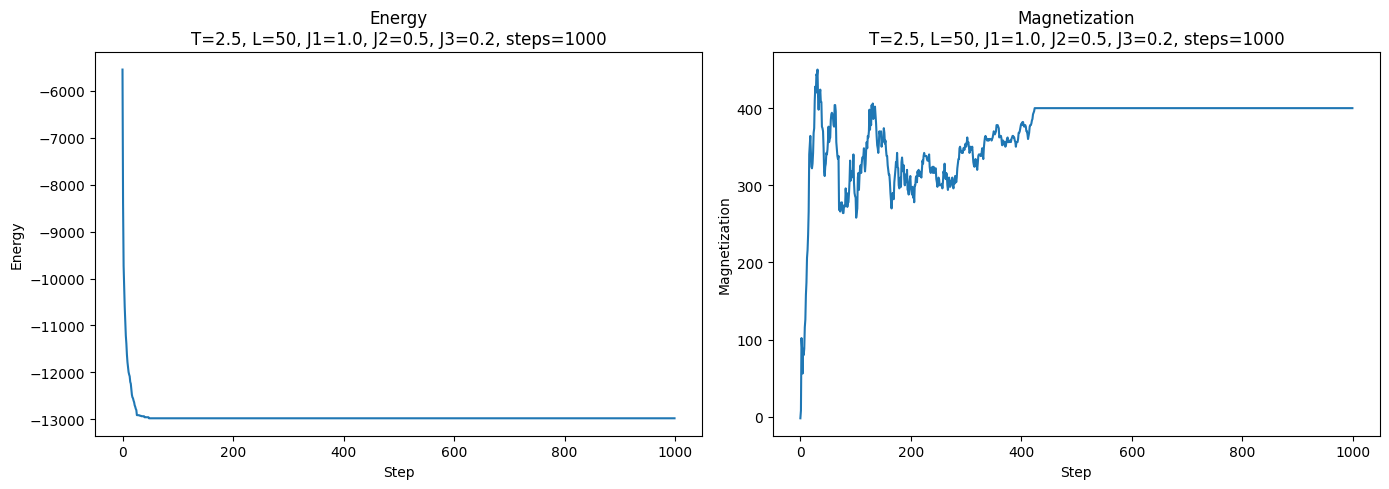

Simulating Ising Model: 100%|██████████| 1000/1000 [06:43<00:00,  2.48it/s]


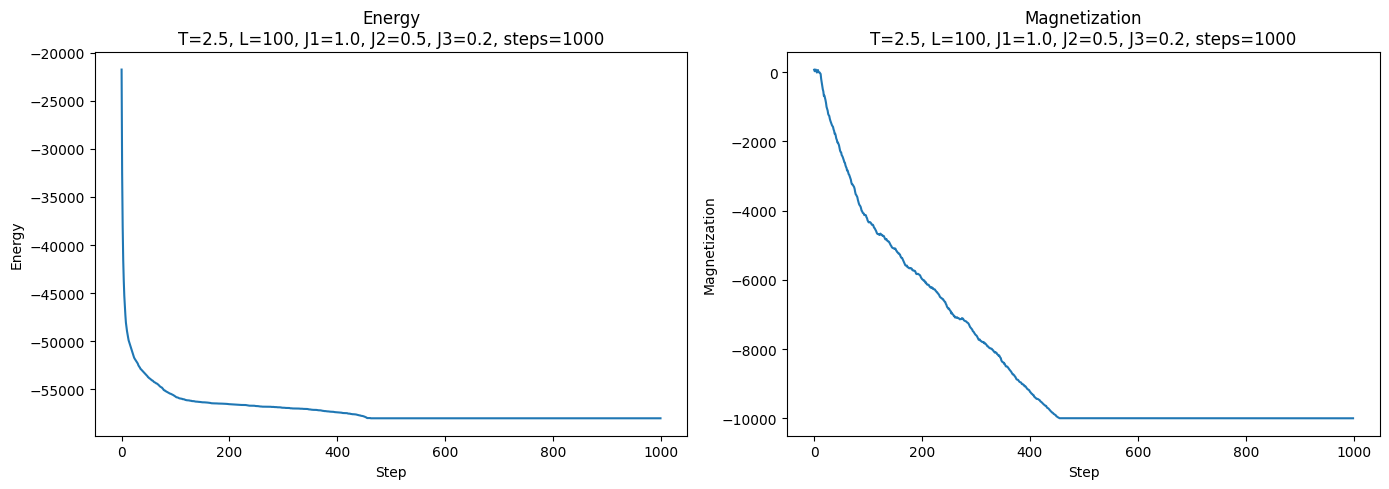

Simulating Ising Model: 100%|██████████| 1000/1000 [26:34<00:00,  1.59s/it]


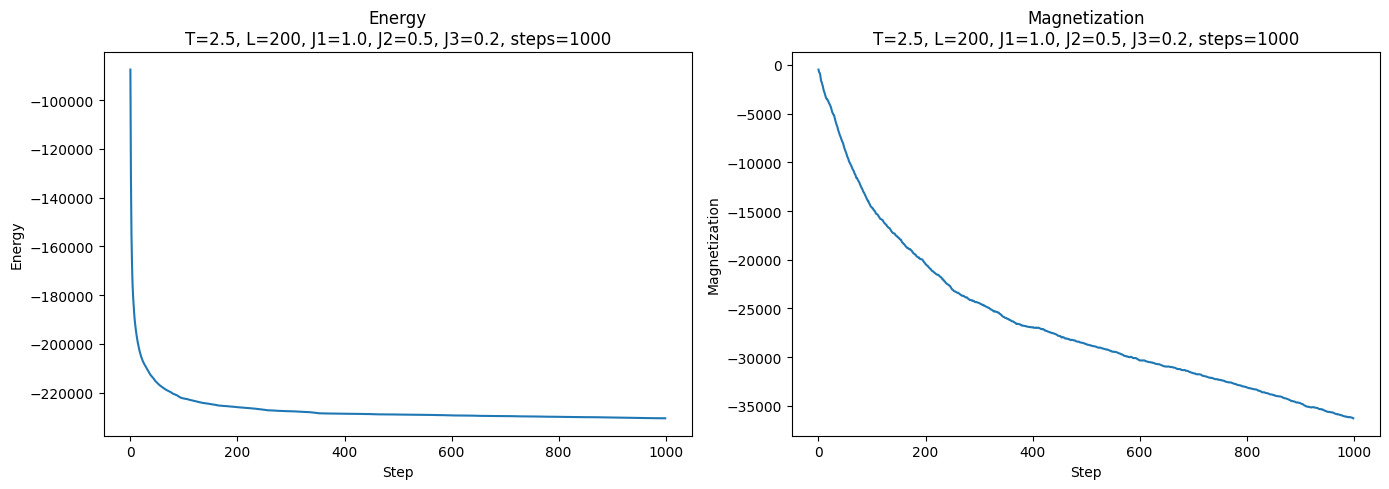

In [ ]:
for L in [5, 10, 20, 50, 100, 200]:
  T = 2.5
  monte_carlo(lattice, T, J1, J2, J3)
  energies, magnetizations = simulate_ising_model(L, T, J1, J2, J3, steps)
  plot_E_M(energies, magnetizations, T, L, J1, J2, J3, steps)

##Role of Interaction constants




J1 = 1; J2 = J3 = 0

In [ ]:
for T in T_values:
        avg_energy, avg_magnetization = simulate_ising_model(L, T, 1, 0, 0, steps)
        average_energies.append(avg_energy)
        average_magnetizations.append(avg_magnetization)

plot_E_M(average_energies, average_magnetizations, T_values, L, 1, 0, 0, steps)

output:
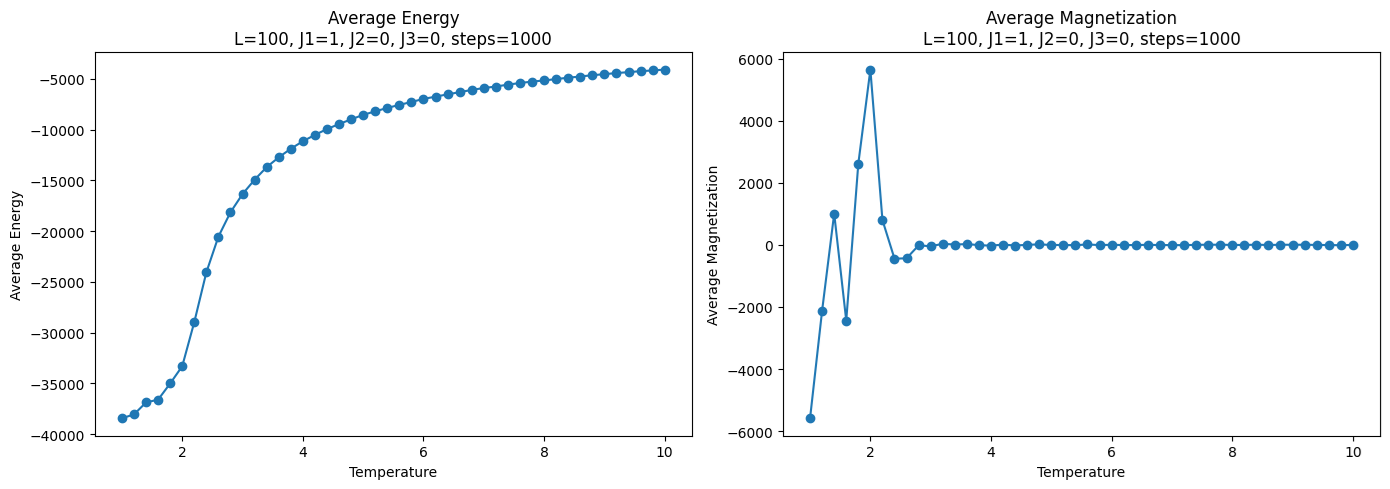

J1 = 1; J2 = 0.5; J3 = 0

In [ ]:
for T in T_values:
        avg_energy, avg_magnetization = simulate_ising_model(L, T, 1, 0.5, 0, steps)
        average_energies.append(avg_energy)
        average_magnetizations.append(avg_magnetization)

plot_E_M(average_energies, average_magnetizations, T_values, L, 1, 0.5, 0, steps)

output:

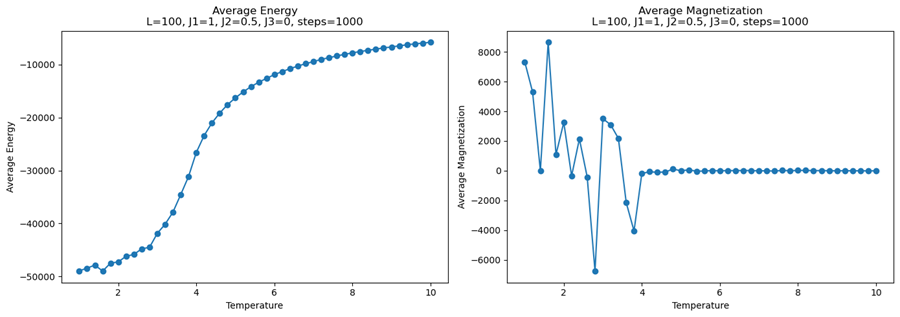

J1 = 1; J2 = 0.5; J3 = 0.2

In [ ]:
for T in T_values:
        avg_energy, avg_magnetization = simulate_ising_model(L, T,  1, 0.5, 0.2, steps)
        average_energies.append(avg_energy)
        average_magnetizations.append(avg_magnetization)
plot_E_M(average_energies, average_magnetizations, T_values, L, 1, 0.5, 0.2, steps)

output:
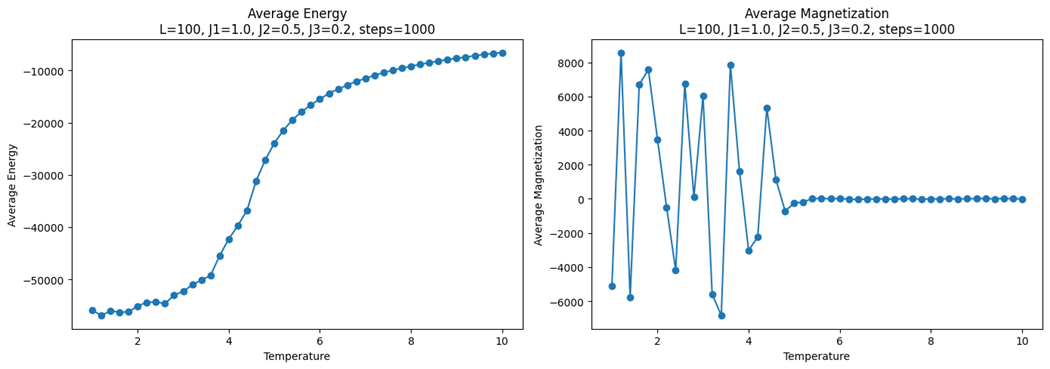